In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/competitions/star-type-classification"

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirillgusevfff
Your Kaggle Key: ··········
Extracting archive ./star-type-classification/star-type-classification.zip to ./star-type-classification


In [ ]:
import pandas as pd

train = pd.read_csv('/content/star-type-classification/train_star.csv')
test = pd.read_csv('/content/star-type-classification/test_star.csv')
sample_submit = pd.read_csv('/content/star-type-classification/sample_submition_stars.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train['TargetClass'])
train['TargetClass'] = le.transform(train['TargetClass'])

In [ ]:
test[test['SpType'].str.contains('Ia')]

,Vmag,Plx,e_Plx,B-V,SpType,Amag
23,4.26,0.47,0.60,-0.008,O9.5Ia SB:,7.620490
147,9.31,-1.12,1.23,0.332,B0.5Ia...,14.556091
181,8.87,1.36,1.52,-0.017,B1Iabn,14.537695
220,10.96,0.19,1.49,-0.049,B2.5Iab:,12.353767
278,7.03,1.09,0.88,0.907,B8Ia,12.217133
...,...,...,...,...,...,...
18273,6.99,1.56,1.25,1.972,M2Iab,12.955623
18345,2.45,1.02,0.57,-0.083,B5Ia,7.493001
18400,5.43,0.02,0.71,-0.089,O7Iab:,1.935149
18535,8.08,2.02,1.16,1.334,B4:Iae,14.606756


In [ ]:
train[train['SpType'].str.contains('Ia')]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
32,3.77,1.05,0.49,0.670,F3Ia,8.875946,0
287,5.68,1.06,0.54,0.233,A3Iab,10.806529,0
311,7.53,-0.72,0.91,1.677,G5Ia,11.816663,0
349,7.94,0.92,0.81,0.501,A9Iab:,12.758940,0
1393,8.87,-0.33,1.10,1.278,F8Ia,11.462570,0
...,...,...,...,...,...,...,...
19695,7.79,0.93,0.96,0.364,A1Iab,12.632415,0
19863,8.15,0.14,0.91,0.508,A0/A1Ia,8.880640,0
19947,1.83,1.82,0.56,0.671,F8Ia,8.130357,0
19966,6.32,2.92,0.55,1.649,M3IIIa,13.646914,0


In [ ]:
import re
train['SpType'] = train['SpType'].str.replace(':', '')
train["SpType"] = train['SpType'].str.split('/')
train["SpType"] = train['SpType'].apply(lambda parts: [
        item
        for part in parts
        # Извлекаем: 1) спектральный класс, 2) светимость (с учетом Ia, Ib, II и т.д.)
        for item in re.findall(r'([A-Z])(?:[0-9]*)([IVXLC]+|I[ab]|II|III|IV|V)?', part)
        for item in filter(None, item)  # Удаляем пустые элементы
    ])
train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,"[G, G, V]",19.483625,1
1,10.86,3.26,2.12,1.840,"[M, V]",18.426088,1
2,8.83,7.57,1.05,0.461,"[F, V]",18.225480,1
3,7.72,24.80,0.89,0.613,"[G, IV]",19.692257,1
4,8.81,3.17,1.03,0.872,"[G, III]",16.315296,0
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,"[F, V]",17.933014,1
20728,9.11,4.71,0.87,0.485,"[F, V]",17.475105,1
20729,9.69,1.61,1.56,0.384,"[A, A, IV]",15.724129,1
20730,8.06,37.33,0.97,0.758,"[K, V]",20.920290,1


In [ ]:
target_columns = ['I', 'II', 'III', 'IV', 'V', 'O', 'B', 'A', 'F', 'G', 'K', 'M']

# Создаем dummy-переменные для элементов в SpType
dummies = (train['SpType'].explode().str.get_dummies().groupby(level=0).max())

# Фильтруем только нужные колонки и добавляем отсутствующие
dummies = dummies.reindex(columns=target_columns, fill_value=0)



# Объединяем результат с исходным DataFrame
train = train.join(dummies)
train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,I,II,III,IV,V,O,B,A,F,G,K,M
0,9.99,7.92,1.61,0.646,"[G, G, V]",19.483625,1,0,0,0,0,1,0,0,0,0,1,0,0
1,10.86,3.26,2.12,1.840,"[M, V]",18.426088,1,0,0,0,0,1,0,0,0,0,0,0,1
2,8.83,7.57,1.05,0.461,"[F, V]",18.225480,1,0,0,0,0,1,0,0,0,1,0,0,0
3,7.72,24.80,0.89,0.613,"[G, IV]",19.692257,1,0,0,0,1,0,0,0,0,0,1,0,0
4,8.81,3.17,1.03,0.872,"[G, III]",16.315296,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,"[F, V]",17.933014,1,0,0,0,0,1,0,0,0,1,0,0,0
20728,9.11,4.71,0.87,0.485,"[F, V]",17.475105,1,0,0,0,0,1,0,0,0,1,0,0,0
20729,9.69,1.61,1.56,0.384,"[A, A, IV]",15.724129,1,0,0,0,1,0,0,0,1,0,0,0,0
20730,8.06,37.33,0.97,0.758,"[K, V]",20.920290,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
train.drop(columns=["SpType"], inplace=True)

<Axes: >

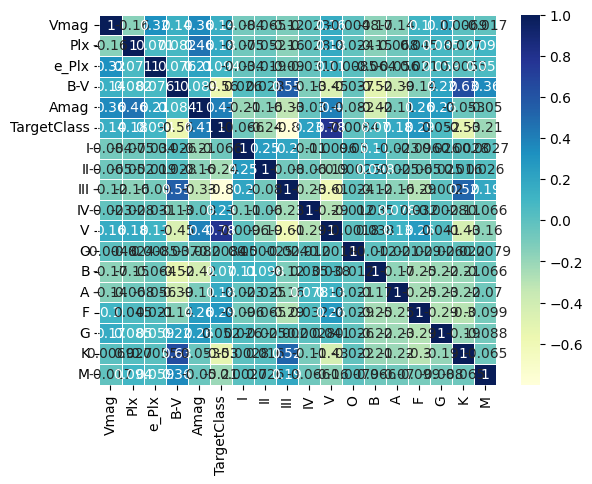

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=0.5)

In [ ]:
train["TargetClass"].value_counts()

,count
TargetClass,
1,15793
0,4939


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20732 entries, 0 to 20731
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         20732 non-null  float64
 1   Plx          20732 non-null  float64
 2   e_Plx        20732 non-null  float64
 3   B-V          20732 non-null  float64
 4   Amag         20732 non-null  float64
 5   TargetClass  20732 non-null  int64  
 6   I            20732 non-null  int64  
 7   II           20732 non-null  int64  
 8   III          20732 non-null  int64  
 9   IV           20732 non-null  int64  
 10  V            20732 non-null  int64  
 11  O            20732 non-null  int64  
 12  B            20732 non-null  int64  
 13  A            20732 non-null  int64  
 14  F            20732 non-null  int64  
 15  G            20732 non-null  int64  
 16  K            20732 non-null  int64  
 17  M            20732 non-null  int64  
dtypes: float64(5), int64(13)
memory usage: 2.8 MB


In [ ]:
train

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,I,II,III,IV,V,O,B,A,F,G,K,M
0,9.99,7.92,1.61,0.646,19.483625,1,0,0,0,0,1,0,0,0,0,1,0,0
1,10.86,3.26,2.12,1.840,18.426088,1,0,0,0,0,1,0,0,0,0,0,0,1
2,8.83,7.57,1.05,0.461,18.225480,1,0,0,0,0,1,0,0,0,1,0,0,0
3,7.72,24.80,0.89,0.613,19.692257,1,0,0,0,1,0,0,0,0,0,1,0,0
4,8.81,3.17,1.03,0.872,16.315296,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,17.933014,1,0,0,0,0,1,0,0,0,1,0,0,0
20728,9.11,4.71,0.87,0.485,17.475105,1,0,0,0,0,1,0,0,0,1,0,0,0
20729,9.69,1.61,1.56,0.384,15.724129,1,0,0,0,1,0,0,0,1,0,0,0,0
20730,8.06,37.33,0.97,0.758,20.920290,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

# Разделение на признаки и целевую переменную (замените 'label' на имя вашего целевого столбца)
X = train.drop(columns = ["TargetClass"])
y = train['TargetClass']

# Разделение на train/test с сохранением распределения классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Проверка распределения классов
print("Train распределение:", Counter(y_train))
print("Test распределение:", Counter(y_test))
print("\nClass counts:")
print(f"Train Giants (1): {sum(y_train == 1)}, Dwarfs (0): {sum(y_train == 0)}")
print(f"Test Giants (1): {sum(y_test == 1)}, Dwarfs (0): {sum(y_test == 0)}")

# Инициализация модели
model = DecisionTreeClassifier(random_state=42)

# Функция для оценки
def evaluate_model(model, X_train, y_train, X_test, y_test, method_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Method': method_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 3),
        'f1_macro': round(f1_score(y_test, y_pred, average='macro'), 3),
        'f1_weighted': round(f1_score(y_test, y_pred, average='weighted'), 3),
        'Recall': round(recall_score(y_test, y_pred, average='macro'), 3),
        'Precision': round(precision_score(y_test, y_pred, average='macro'), 3)
    }

results = []

# 1. Без балансировки
results.append(evaluate_model(model, X_train, y_train, X_test, y_test, "No Balancing"))

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
results.append(evaluate_model(model, X_rus, y_rus, X_test, y_test, "Random Undersampling"))

# 3. TomekLinks + Random Undersampling
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)
rus = RandomUnderSampler(random_state=42)
X_tomek_rus, y_tomek_rus = rus.fit_resample(X_tomek, y_tomek)
results.append(evaluate_model(model, X_tomek_rus, y_tomek_rus, X_test, y_test, "Tomek + Undersampling"))

# 4. NearMiss
nearmiss = NearMiss(version=2)
X_nm, y_nm = nearmiss.fit_resample(X_train, y_train)
results.append(evaluate_model(model, X_nm, y_nm, X_test, y_test, "NearMiss"))

# 5. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
results.append(evaluate_model(model, X_ros, y_ros, X_test, y_test, "Random Oversampling"))

# 6. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
results.append(evaluate_model(model, X_smote, y_smote, X_test, y_test, "SMOTE"))

# 7. ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
results.append(evaluate_model(model, X_adasyn, y_adasyn, X_test, y_test, "ADASYN"))

# Результаты
results_df = pd.DataFrame(results)
print("\nРезультаты сравнения методов:")
print(results_df.to_markdown(index=False, tablefmt="grid"))

Train распределение: Counter({1: 12634, 0: 3951})
Test распределение: Counter({1: 3159, 0: 988})

Class counts:
Train Giants (1): 12634, Dwarfs (0): 3951
Test Giants (1): 3159, Dwarfs (0): 988

Результаты сравнения методов:
+-----------------------+------------+------------+---------------+----------+-------------+
| Method                |   Accuracy |   f1_macro |   f1_weighted |   Recall |   Precision |
+=======================+============+============+===============+==========+=============+
| No Balancing          |      0.999 |      0.998 |         0.999 |    0.998 |       0.998 |
+-----------------------+------------+------------+---------------+----------+-------------+
| Random Undersampling  |      0.999 |      0.998 |         0.999 |    0.999 |       0.998 |
+-----------------------+------------+------------+---------------+----------+-------------+
| Tomek + Undersampling |      0.999 |      0.998 |         0.999 |    0.999 |       0.998 |
+-----------------------+-------

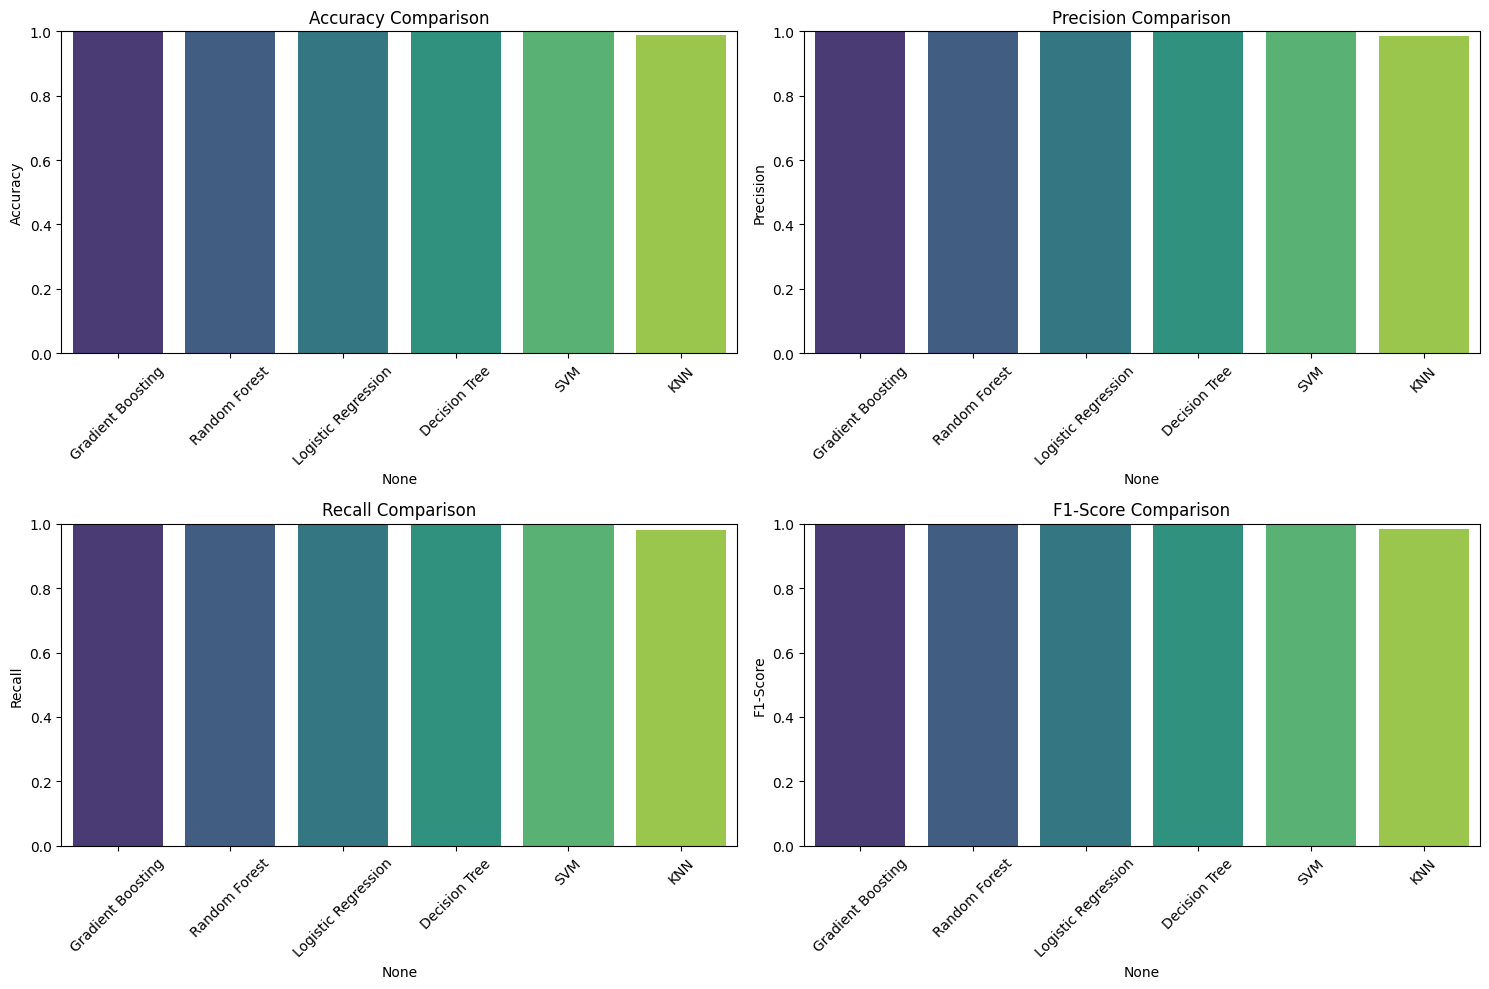

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Определение метрик для классификации
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = {}

# Кросс-валидация для каждой модели
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    results[name] = {
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision_macro']),
        'Recall': np.mean(cv_results['test_recall_macro']),
        'F1-Score': np.mean(cv_results['test_f1_macro'])
    }

# Создание DataFrame с результатами
results_df = pd.DataFrame.from_dict(results, orient='index').sort_values('F1-Score', ascending=False)

# Визуализация результатов
plt.figure(figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Ограничение для метрик классификации

plt.tight_layout()
plt.show()

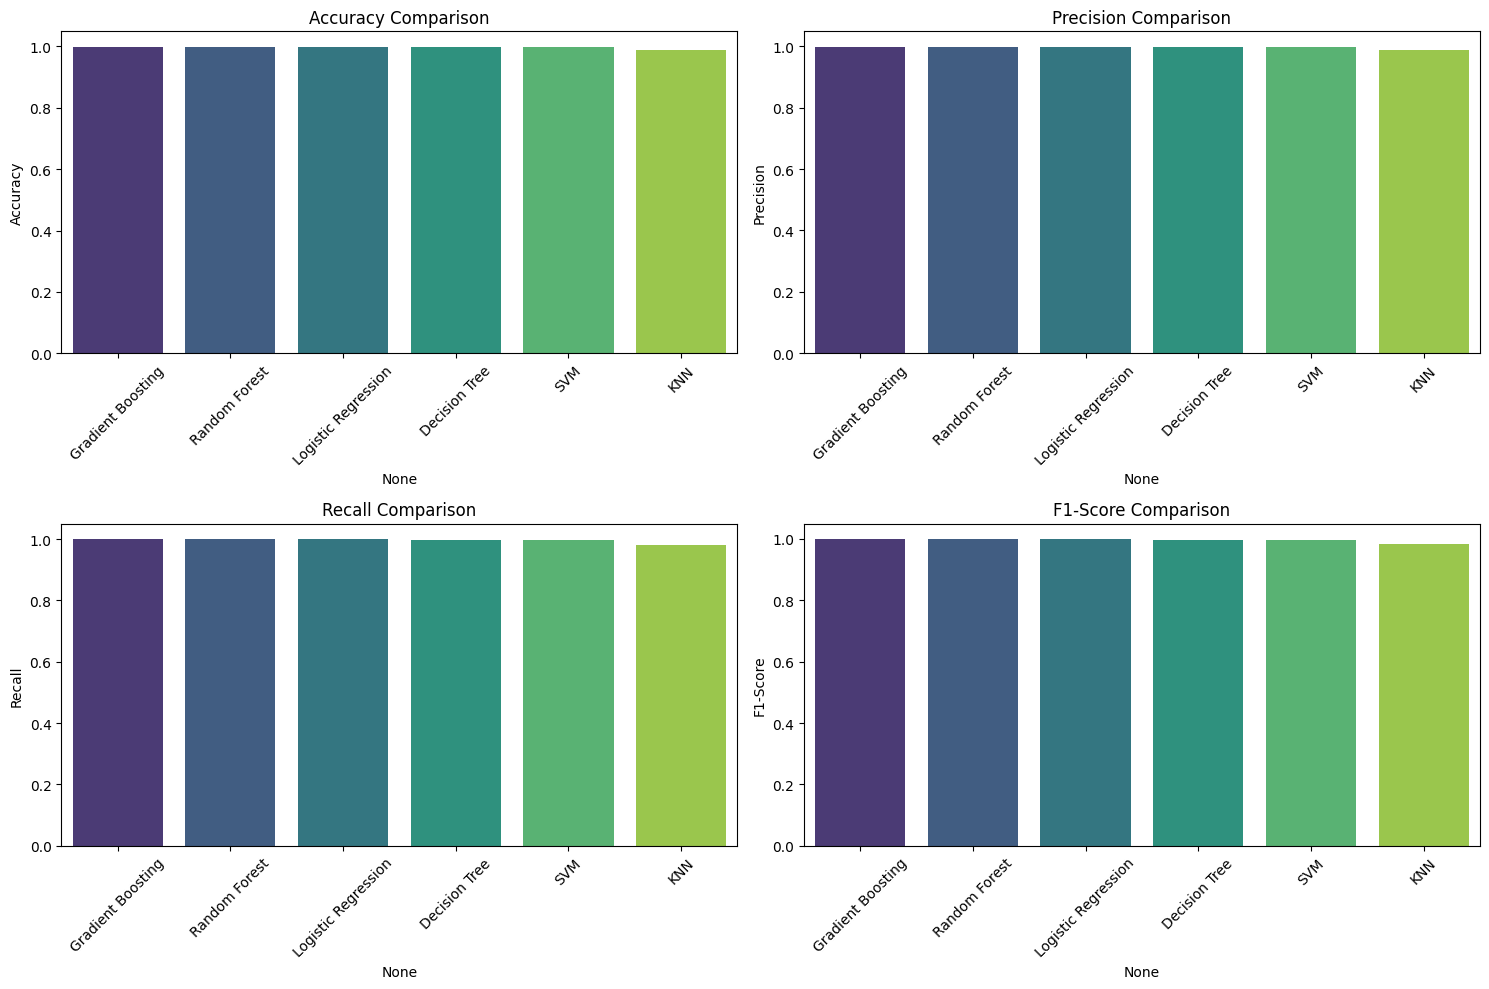

In [ ]:
plt.figure(figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
results_df

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting,0.999373,0.998758,0.999519,0.999137
Random Forest,0.999325,0.998726,0.999418,0.999071
Logistic Regression,0.998794,0.997486,0.999208,0.998343
Decision Tree,0.998553,0.998149,0.997867,0.998006
SVM,0.997926,0.996907,0.997386,0.997145
KNN,0.987845,0.986478,0.979916,0.983143


In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем модель
rf_model = RandomForestClassifier(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Количество деревьев
    'max_depth': [10, 20, 30],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимальное количество сэмплов для разбиения узла
    'min_samples_leaf': [2, 4, 6],  # Минимальное количество сэмплов в листе
    'max_features': ['auto', 'sqrt', 'log2'],  # Количество признаков для поиска лучшего разбиения
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=2)

# Обучение на данных
grid_search.fit(X, y)

# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best score (recall): {best_score:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score (recall): 0.9991


In [ ]:
X = train.drop(columns = ["TargetClass"])
y = train['TargetClass']
adasyn = ADASYN(random_state=42)
X_final_bal, y_final_bal = adasyn.fit_resample(X, y)

In [ ]:
final_model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

final_model.fit(X_final_bal, y_final_bal)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
test['SpType'] = test['SpType'].str.replace(':', '')
test["SpType"] = test['SpType'].str.split('/')
test["SpType"] = test['SpType'].apply(lambda parts: [
        item
        for part in parts
        # Извлекаем: 1) спектральный класс, 2) светимость (с учетом Ia, Ib, II и т.д.)
        for item in re.findall(r'([A-Z])(?:[0-9]*)([IVXLC]+|I[ab]|II|III|IV|V)?', part)
        for item in filter(None, item)  # Удаляем пустые элементы
    ])
test

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,7.91,6.33,1.01,0.843,"[G, III]",16.917019
1,7.35,1.30,0.53,1.304,"[K, K, III]",12.919716
2,6.75,8.01,0.84,1.019,"[K, III]",16.268162
3,4.47,7.03,0.72,1.283,"[K, III]",13.704777
4,7.33,2.45,1.14,1.600,"[K, III]",14.275830
...,...,...,...,...,...,...
18815,7.72,2.41,1.05,1.487,"[K, III]",14.630085
18816,8.27,1.98,0.81,1.005,"[K, III]",14.753326
18817,8.53,1.14,0.89,-0.093,"[B, B, III]",13.814524
18818,9.09,6.41,1.10,0.480,"[F, V]",18.124290


In [ ]:
target_columns = ['I', 'II', 'III', 'IV', 'V', 'O', 'B', 'A', 'F', 'G', 'K', 'M']

# Создаем dummy-переменные для элементов в SpType
dummies = (test['SpType'].explode().str.get_dummies().groupby(level=0).max())

# Фильтруем только нужные колонки и добавляем отсутствующие
dummies = dummies.reindex(columns=target_columns, fill_value=0)



# Объединяем результат с исходным DataFrame
test = test.join(dummies)
test

,Vmag,Plx,e_Plx,B-V,SpType,Amag,I,II,III,IV,V,O,B,A,F,G,K,M
0,7.91,6.33,1.01,0.843,"[G, III]",16.917019,0,0,1,0,0,0,0,0,0,1,0,0
1,7.35,1.30,0.53,1.304,"[K, K, III]",12.919716,0,0,1,0,0,0,0,0,0,0,1,0
2,6.75,8.01,0.84,1.019,"[K, III]",16.268162,0,0,1,0,0,0,0,0,0,0,1,0
3,4.47,7.03,0.72,1.283,"[K, III]",13.704777,0,0,1,0,0,0,0,0,0,0,1,0
4,7.33,2.45,1.14,1.600,"[K, III]",14.275830,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18815,7.72,2.41,1.05,1.487,"[K, III]",14.630085,0,0,1,0,0,0,0,0,0,0,1,0
18816,8.27,1.98,0.81,1.005,"[K, III]",14.753326,0,0,1,0,0,0,0,0,0,0,1,0
18817,8.53,1.14,0.89,-0.093,"[B, B, III]",13.814524,0,0,1,0,0,0,1,0,0,0,0,0
18818,9.09,6.41,1.10,0.480,"[F, V]",18.124290,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
test.drop(columns=["SpType"], inplace=True)

In [ ]:
test

,Vmag,Plx,e_Plx,B-V,Amag,I,II,III,IV,V,O,B,A,F,G,K,M
0,7.91,6.33,1.01,0.843,16.917019,0,0,1,0,0,0,0,0,0,1,0,0
1,7.35,1.30,0.53,1.304,12.919716,0,0,1,0,0,0,0,0,0,0,1,0
2,6.75,8.01,0.84,1.019,16.268162,0,0,1,0,0,0,0,0,0,0,1,0
3,4.47,7.03,0.72,1.283,13.704777,0,0,1,0,0,0,0,0,0,0,1,0
4,7.33,2.45,1.14,1.600,14.275830,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18815,7.72,2.41,1.05,1.487,14.630085,0,0,1,0,0,0,0,0,0,0,1,0
18816,8.27,1.98,0.81,1.005,14.753326,0,0,1,0,0,0,0,0,0,0,1,0
18817,8.53,1.14,0.89,-0.093,13.814524,0,0,1,0,0,0,1,0,0,0,0,0
18818,9.09,6.41,1.10,0.480,18.124290,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
y_pred_test = final_model.predict(test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
ans_df = pd.DataFrame(y_pred_test, columns=['TargetClass'])

ans_df.reset_index(inplace=True)

In [ ]:
ans_df.to_csv('submition_v1.csv', index=False)